In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data_frame = pd.read_csv('C:/Users/Martuza/Documents/Vaccine_new/reactions_hospitalized.csv')

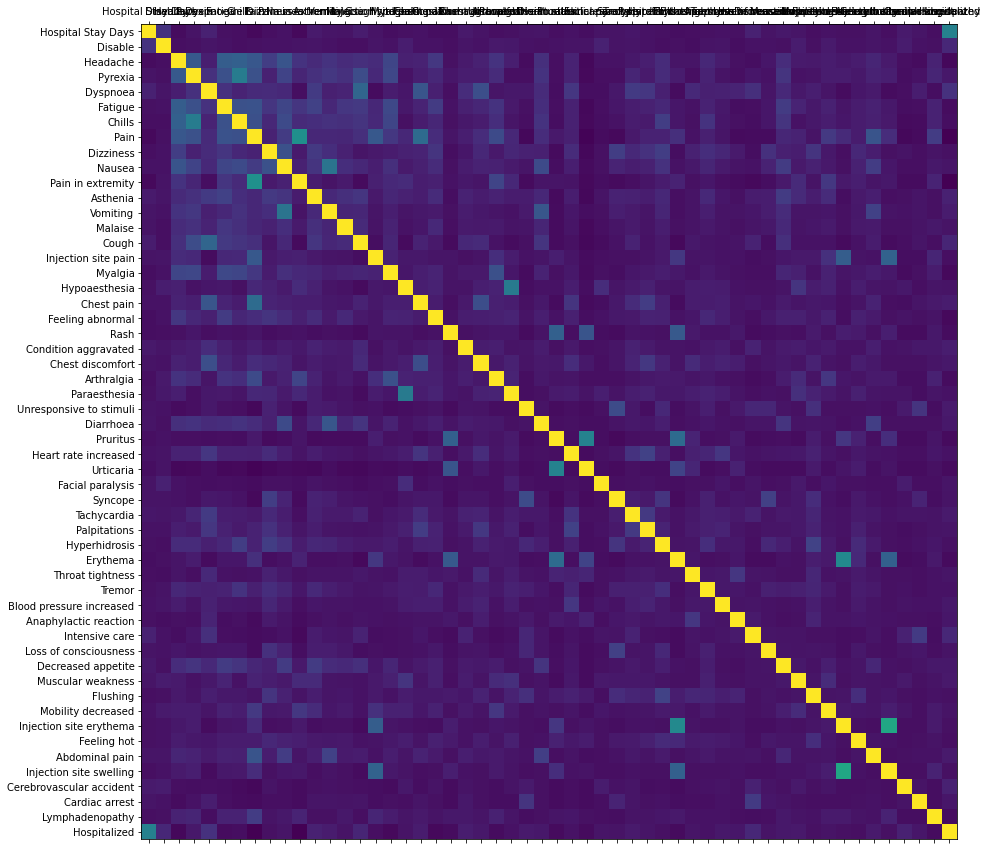

65.84% in training set
16.46% in test set


In [3]:
from sklearn.model_selection import train_test_split

def corr_heatmap(data_frame, size=11):
  correlation = data_frame.corr()
  fig, heatmap = plt.subplots(figsize=(size, size))
  heatmap.matshow(correlation)
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)
  plt.show()

corr_heatmap(data_frame,15)

clm = data_frame.columns
feature_column_names = clm[:-1]

predicted_class_name = ['Hospitalized']

X = data_frame[feature_column_names].values
y = data_frame[predicted_class_name].values

#from imblearn.under_sampling import SMOTE 
#sm = SMOTE(random_state = 42)
#X, y = sm.fit_resample(X, y)

from imblearn.combine import SMOTEENN
smt = SMOTEENN(random_state=42)
X, y = smt.fit_sample(X, y)

split_test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X.shape

(59373, 53)

In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())
rf_predict_train = rf_model.predict(X_train)
rf_accuracy_traindata = metrics.accuracy_score(y_train, rf_predict_train)

importances = rf_model.feature_importances_

y_pred = rf_model.predict(X_test)

print ("RF Training accuracy: {0:.2f}".format(rf_accuracy_traindata))
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

RF Training accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7864
           0       1.00      1.00      1.00      4011

    accuracy                           1.00     11875
   macro avg       1.00      1.00      1.00     11875
weighted avg       1.00      1.00      1.00     11875

Test Accuracies
1.00
1.00
1.00
1.00
1.00
0.07
Feature importnaces:
0.6687034013653638
0.0032561076945817487
0.024660949431665264
0.007279893039955753
0.010532726373811934
0.01940937246705094
0.009129051124156665
0.05478775692981647
0.014737310038322779
0.006827774518334911
0.021207149030069414
0.006202796104601977
0.005118771194760399
0.004527807854447335
0.011645524107361364
0.003183240789271167
0.009249992424621668
0.0025748448172017604
0.008336006128306268
0.008847015524271888
0.0056913611209494334
0.0048674820661760146
0.001886745998821588
0.009718238495029667
0.003208209385278239
0.0013914487675319223
0.0034889207214927618
0.00632213

In [5]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

lgbm = lgb.LGBMClassifier(random_state = 42)
lgbm.fit(X_train, y_train.ravel())

y_t = lgbm.predict(X_train)
y_t = np.where(y_t > 0.5, 1, 0)

importances = lgbm.feature_importances_

train_acc = metrics.accuracy_score(y_train, y_t)

print ("LGBM Training accuracy: {0:.2f}".format(train_acc))

# predict
y_pred = lgbm.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

print ("Confusion Matrix")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

LGBM Training accuracy: 0.99
Confusion Matrix
[[7803   61]
 [  33 3978]]
Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      0.99      7864
           0       0.98      0.99      0.99      4011

    accuracy                           0.99     11875
   macro avg       0.99      0.99      0.99     11875
weighted avg       0.99      0.99      0.99     11875

Test Accuracies
0.99
1.00
0.99
0.99
0.99
0.27
Feature importnaces:
92
54
141
123
87
140
94
151
101
104
78
103
87
66
85
37
59
57
86
44
76
65
30
82
44
13
31
84
33
45
1
34
32
38
36
42
27
59
19
15
60
50
22
41
18
31
32
19
37
40
22
12
21


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

# Create a RandomForestClassifier object
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)
dtc_predict_train = dtc_model.predict(X_train)

#get accuracy
dtc_accuracy = metrics.accuracy_score(y_train, dtc_predict_train)

#print accuracy
print ("DT training Accuracy: {0:.2f}".format(dtc_accuracy))

importances = dtc_model.feature_importances_

y_pred = dtc_model.predict(X_test)

print ("Confusion Matrix for Decision Tree")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

DT training Accuracy: 1.00
Confusion Matrix for Decision Tree
[[7851   13]
 [  54 3957]]
Classification Report

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      7864
           0       1.00      0.99      0.99      4011

    accuracy                           0.99     11875
   macro avg       0.99      0.99      0.99     11875
weighted avg       0.99      0.99      0.99     11875

Test Accuracies
0.99
0.99
1.00
1.00
0.99
0.19
Feature importnaces:
0.8551265169684301
0.002614696847432234
0.00818837226899772
0.004853743076888942
0.006727987834995696
0.006856353236679759
0.004259193800490069
0.011775076937608259
0.004348266974909179
0.004081892818977414
0.0028998331455264014
0.004003733536110577
0.0027094928312014393
0.003571469842648524
0.011320032323970075
0.0019110280643089162
0.0026346363060422116
0.0009689529098116272
0.003822785944373349
0.0022415239542350964
0.0021419457195682974
0.004211791591456288
0.0009345445422021601
0.0023

In [7]:
from xgboost import XGBClassifier
from sklearn import metrics
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

# Create a RandomForestClassifier object
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predict_train = xgb_model.predict(X_train)
xgb_accuracy = metrics.accuracy_score(y_train, xgb_predict_train)

#print accuracy
print ("XGB training Accuracy: {0:.2f}".format(xgb_accuracy))


importances = xgb_model.feature_importances_

y_pred = xgb_model.predict(X_test)

print ("Confusion Matrix for XGBoost")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

[22:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Martuza\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB training Accuracy: 0.99
Confusion Matrix for XGBoost
[[7818   46]
 [  40 3971]]
Classification Report

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      7864
           0       0.99      0.99      0.99      4011

    accuracy                           0.99     11875
   macro avg       0.99      0.99      0.99     11875
weighted avg       0.99      0.99      0.99     11875

Test Accuracies
0.99
0.99
0.99
0.99
0.99
0.25
Feature importnaces:
0.85527
0.0030694227
0.0033422667
0.0020887232
0.0036964784
0.0020075089
0.002196393
0.0027959882
0.0026870589
0.0021363627
0.0035341377
0.0029080152
0.0027047866
0.002753835
0.005624059
0.0028845232
0.0023492735
0.0017915275
0.0040396587
0.00403105
0.003827679
0.004934738
0.0012952514
0.0021606502
0.0021377252
0.0046616187
0.0011096535
0.005722103
0.0014323127
0.006018623
0.0004371023
0.0025751486
0.0013641646
0.0032853598
0.0016318532
0.003086737
0.0014704809
0.0018025888
0.0011753135
0.00123

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

# Create a RandomForestClassifier object
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1,
                                      subsample=1,max_features='sqrt', random_state=42)
baseline.fit(X_train, y_train)
gbm_predict_train = baseline.predict(X_train)
gbm_accuracy = metrics.accuracy_score(y_train, gbm_predict_train)

print ("GBM training Accuracy: {0:.2f}".format(gbm_accuracy))

importances = baseline.feature_importances_

y_pred = baseline.predict(X_test)

print ("Confusion Matrix for GBM")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

GBM training Accuracy: 0.97
Confusion Matrix for GBM
[[7554  310]
 [  22 3989]]
Classification Report

              precision    recall  f1-score   support

           1       1.00      0.96      0.98      7864
           0       0.93      0.99      0.96      4011

    accuracy                           0.97     11875
   macro avg       0.96      0.98      0.97     11875
weighted avg       0.97      0.97      0.97     11875

Test Accuracies
0.97
1.00
0.96
0.98
0.98
0.97
Feature importnaces:
0.856261476041662
0.0005838795371775697
0.014953258579941077
0.0012886742474864721
0.007261702360115664
0.004153148643969722
0.0007499234884810089
0.0318569164315736
0.008703003821013614
0.002452341357791214
0.011574321892750084
0.0012430046120071056
0.001082095704360528
0.0002750107656058205
0.0068697256413878085
6.520940217311465e-05
0.013831004896069149
6.672789802609367e-05
0.004136700483516606
0.0059351075905093795
0.0006833353100230861
0.0005142293276661291
0.00014322155014041057
0.0040526235

In [9]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

# Create a RandomForestClassifier object
clf = svm.SVC(kernel='rbf', random_state=42)

clf.fit(X_train, y_train)
svm_predict_train = clf.predict(X_train)

#get accuracy
svm_train_accuracy = metrics.accuracy_score(y_train, svm_predict_train)

#print accuracy
print ("SVM training Accuracy: {0:.2f}".format(svm_train_accuracy))

#importances = clf.coef_[0]

y_pred = clf.predict(X_test)

print ("Confusion Matrix for SVM")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))


y_pred = np.where(y_pred > 0.5, 1, 0)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

#for i in importances:
#    print(i)

SVM training Accuracy: 0.98
Confusion Matrix for SVM
[[7522  342]
 [ 120 3891]]
Classification Report

              precision    recall  f1-score   support

           1       0.98      0.96      0.97      7864
           0       0.92      0.97      0.94      4011

    accuracy                           0.96     11875
   macro avg       0.95      0.96      0.96     11875
weighted avg       0.96      0.96      0.96     11875

Test Accuracies
0.96
0.98
0.96
0.97
0.96
1.34
Feature importnaces:


In [10]:
from sklearn.metrics import roc_curve

pred_prob1 = rf_model.predict_proba(X_test)
pred_prob2 = dtc_model.predict_proba(X_test)
pred_prob3 = xgb_model.predict_proba(X_test)
pred_prob4 = baseline.predict_proba(X_test)
pred_prob5 = clf.decision_function(X_test)
pred_prob6 = lgbm.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

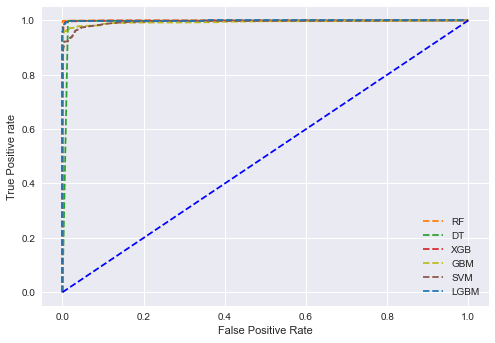

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='#ff7f0e', label='RF')
plt.plot(fpr2, tpr2, linestyle='--',color='#2ca02c', label='DT')
plt.plot(fpr3, tpr3, linestyle='--',color='#d62728', label='XGB')
plt.plot(fpr4, tpr4, linestyle='--',color='#bcbd22', label='GBM')
plt.plot(fpr5, tpr5, linestyle='--',color='#8c564b', label='SVM')
plt.plot(fpr6, tpr6, linestyle='--',color='#1f77b4', label='LGBM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('reactions_hospitalized',dpi=300)
plt.show();